<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01794299/blob/main/Actividad_semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [7]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [22]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
#genera 100 numeros aleatorios con limite máximo de 1 
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

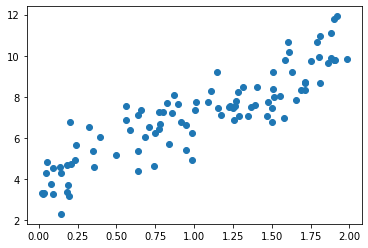

In [5]:
#generar datos juguete multiplicando 2 por los números random
X = 2*np.random.rand(100, 1)
#ecuacion anterior y=3X+4+noise, se agrega ruido pero poco para que sea mas realista
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [10]:
import pandas as pd
#puede crearse un dataset con pandas y usarlo
pd.DataFrame(y)

,Manufacturing Cost
0,95.066056
1,96.531750
2,73.661311
3,95.566843
4,98.777013
...,...
995,23.855067
996,27.536542
997,25.973787
998,25.138311


In [9]:
from sklearn.linear_model import LinearRegression
#se basa en los mínimos cuadrados
#se guarda el método de regresion lineal
linear_reg = LinearRegression(fit_intercept=True)
#estimar línea roja de la gráfica
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

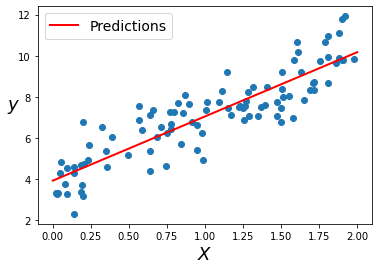

In [8]:
# construct best fit line
#imprimir línea roja
#la x irá desde el 0 hasta el 2
X_fit = np.linspace(0, 2, 100)
#ver que valor tendría y 
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
#grafica
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#la  linea roja debe estar ajustada para ver si está correcta la predicción (no muy arrriba ni abajo)

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.92299009],
       [10.16971985]])

In [13]:
 #obtener coeficientes y el sesgo para formula, llamamos variable linear_reg donde se guardó el regresor que ya tiene el modelo adentro(por el fit)
 #coef multiplica a la x e intercept es el sesgo o b
 linear_reg.coef_, linear_reg.intercept_

(array([[3.12336488]]), array([3.92299009]))

The model estimates:

$\hat{y} = 3.12X + 3.92$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
#si el grado es muy alto, se llega a hacer overfitting, solo funcionaría para los datos del entrenamiento
#generar datos de juguete
m = 100
#número aleatorio
X = 6 * np.random.rand(m, 1) - 3
#aplicamos formula mas ruido
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

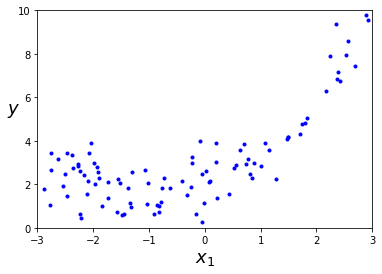

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);
#modelo polinomial para no dejar fuera los datos de la izquierda

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,6.772755
1,0.640017
2,2.135981
3,4.319231
4,1.842375
...,...
95,0.744091
96,3.334690
97,3.441915
98,2.050856


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
# tomar x a tipo polinomial
from sklearn.preprocessing import PolynomialFeatures
#grado al que va a convertirse x
poly_features = PolynomialFeatures(degree=2, include_bias=False)
#transformación, tenemos x y su versión al cuadrado
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00],
       [ 4.25427011e-01,  1.80988142e-01],
       [-2.88979418e+00,  8.35091039e+00],
       [-1.05861711e-01,  1.12067018e-02],
       [-1.73790252e+00,  3.02030517e+00],
       [-9.23900594e-01,  8.53592308e-01],
       [ 1.65482841e+00,  2.73845708e+00],
       [ 2.64742503e+00,  7.00885927e+00],
       [-2.56550237e+00,  6.58180240e+00],
       [ 2.05453236e-01,  4.22110321e-02],
       [ 2.29520091e+00,  5.26794724e+00],
       [-2.50494879e+00,  6.27476846e+00],
       [ 1.94708428e+00,  3.79113720e+00],
       [-8.53191894e-01,  7.27936409e-01],
       [-1.06743179e+00,  1.13941062e+00],
       [ 2.86479832e+00,  8.20706940e+00],
       [-1.79484546e+00,  3.22147023e+00],
       [ 1.15916364e+00,  1.34366036e+00],
       [ 1.92864437e+00,  3.71966910e+00],
       [-2.75289903e+00,  7.57845306e+00],
       [ 1.02231275e+00,  1.04512336e+00],
       [ 2.70929985e+00,  7.34030566e+00],
       [-2.25468020e+00,  5.08358280e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
#comprobar que es x y su cuadrado
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
#arreglo de cuadrados en posición 0
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [18]:
lin_reg = LinearRegression(fit_intercept=True)
#entrenamiento de datos polinomiales
lin_reg.fit(X_poly, y)

lin_reg.coef_, lin_reg.intercept_

(array([[1.03780025, 0.49597826]]), array([1.94702036]))

The model estimates:

$\hat{y} = 1.03X +0.49X^2 + 1.94$

Plot the data and the predictions:

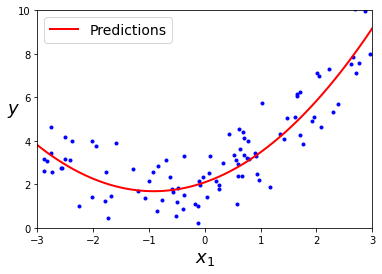

In [ ]:
#linea roja
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
#generar x a grado 1 y 2
X_new_poly = poly_features.transform(X_new)
#y
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

**medidas de error**

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)
 

 dice que tan lejos quedaron los datos puntos del modelo que se estimó, para saber si el modelo se adaptó bien a los datos o no, r cuadrada ajustada para situaciones complicadas o con muchas variables

# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [80]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
379,4.087006,45.036840
130,3.006915,58.642098
470,4.325755,38.136724
419,4.200602,29.119848
189,3.278806,30.119867
630,4.939657,29.173452
634,4.950786,33.223241
878,5.980289,37.426675
981,7.503608,24.799148
431,4.229363,44.151539


In [81]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [82]:
len(X)

1000

In [83]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

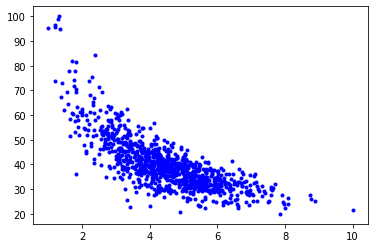

In [84]:
plt.plot(X,y,'b.')

# **Regresión lineal simple**

In [87]:
#simple lineal regression
#y=ax+b
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)


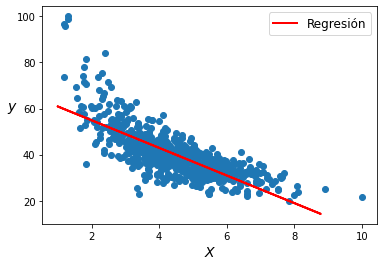

In [88]:
#regresión lineal simple
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
#grafica
X_reg = X_test 
y_reg = linear_reg.predict(X_reg)
plt.scatter(X_train, y_train)
plt.plot(X_reg, y_reg, "r-", linewidth=2, label="Regresión")
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.xlabel("$X$", fontsize=14)
plt.legend(loc="upper right", fontsize=12);

In [89]:
#Ecuación
linear_reg.coef_, linear_reg.intercept_
print('Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

Y = [-5.98980103] X + 66.89748040122576


In [90]:
#arreglos para grafica de mae y r2
mae_list =[] 
r2_list =[] 

In [91]:
#MAE
mae_reg = metrics.mean_absolute_error(y_test,y_reg)
mae_list.append(mae_reg) 
#R2
r2_reg = r2_score(y_test,y_reg)
r2_list.append(r2_reg)
#errores
print('MAE:', metrics.mean_absolute_error(y_test,y_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_reg)))
#r2
print('R2:', r2_score(y_test,y_reg))

MAE: 4.848701594938563
RMSE: 6.73635897582296
R2: 0.6056489925064351


# **Regresión polinomial**

In [92]:
# regresión polinomial

poly_ft = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_ft.fit_transform(X_train)
X_poly

array([[ 3.74792469, 14.04693946],
       [ 3.17819194, 10.10090401],
       [ 4.39899419, 19.35114987],
       ...,
       [ 3.94046305, 15.52724904],
       [ 4.52448429, 20.4709581 ],
       [ 5.86814353, 34.43510849]])

In [93]:
poly_reg = LinearRegression(fit_intercept=True)
poly_reg.fit(X_poly, y_train)
poly_reg.coef_, poly_reg.intercept_

(array([-16.31070656,   1.12220051]), 88.6430234056414)

In [94]:
X_poly.shape

(700, 2)

In [95]:
X_poly_test = poly_ft.fit_transform(X_test)
X_poly_test.shape

(300, 2)

In [96]:
y_reg_poly = poly_reg.predict(X_poly_test)
y_reg_poly.shape

(300,)

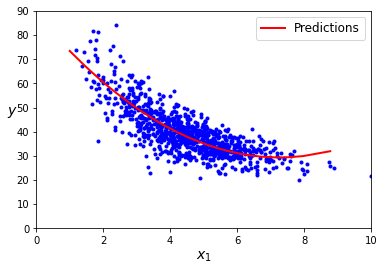

In [97]:
order = np.argsort(X_test.values.ravel()) 

sortedX = X_test.values.ravel()[order] #Ordenamos los en un orden ordenado
sortedY = y_test.values.ravel()[order]
sorted_poly = y_reg_poly[order]

plt.plot(X, y, "b.")  #Aqui es para que veamos mas a detalle la linea de regresion, todo es cuestion de perspectiva
plt.plot(sortedX, sorted_poly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12)
plt.axis([0, 10, 0, 90]);

In [98]:
print('Y =', poly_reg.coef_[1],'X^2 +', poly_reg.coef_[0],'X +',poly_reg.intercept_)

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_reg_poly)
mae_list.append(mae_regresion_lineal_multiple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_multiple = r2_score(y_test,y_reg_poly)
r2_list.append(r2_regresion_lineal_multiple)

mae_poly = metrics.mean_absolute_error(y_test, y_reg_poly)
r2Score = r2_score(y_test, y_reg_poly)

print('MAE:', mae_poly)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_reg_poly)))
print('R2',r2Score)

Y = 1.1222005144772753 X^2 + -16.310706562434078 X + 88.6430234056414
MAE: 4.312234249307489
Root Mean Squared Error: 5.778833048851249
R2 0.7097897110152587


# **Ridge**

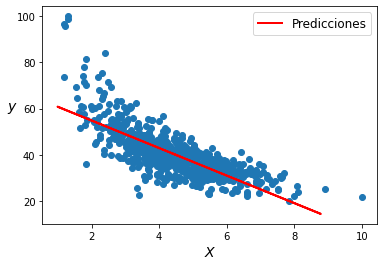

In [99]:
#ridge
ridge_reg = Ridge(alpha=5.0,fit_intercept=True)
ridge_reg.fit(X_train, y_train)
X_ridge = X_test  
y_ridge = ridge_reg.predict(X_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_ridge, y_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12);

In [100]:
#formula
print('Y =', ridge_reg.coef_,'X +', ridge_reg.intercept_)
mae_ridge = metrics.mean_absolute_error(y_test,y_ridge)
mae_list.append(mae_ridge) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_ridge= r2_score(y_test,y_ridge)
r2_list.append(r2_ridge)

#errores
mae_ridge = metrics.mean_absolute_error(y_test, y_ridge)
r2Score = r2_score(y_test, y_ridge)
print('MAE:', mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge)))
#r2
print('R2',r2Score)



Y = [-5.96548298] X + 66.78877749985897
MAE: 4.848960238465538
Root Mean Squared Error: 6.737377332113401
R2 0.6055297529631285


# **Lasso**

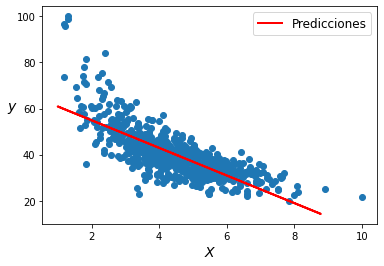

In [101]:
#lasso
lasso = Lasso(alpha=0.001,fit_intercept=True) 
lasso.fit(X_train, y_train)
X_lasso = X_test  
y_lasso = lasso.predict(X_lasso)
plt.scatter(X_train, y_train)
plt.plot(X_lasso, y_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.legend(loc="upper right", fontsize=12);

In [102]:
#ecuacion
print('Y =', lasso.coef_,'X +', lasso.intercept_)
mae_lasso = metrics.mean_absolute_error(y_test,y_lasso)
mae_list.append(mae_lasso) 
r2_lasso= r2_score(y_test,y_lasso)
r2_list.append(r2_lasso)


mae_lasso = metrics.mean_absolute_error(y_test, y_lasso)
r2Score = r2_score(y_test, y_lasso)

#errores
print('MAE:', mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso)))

#r2
print('r2_score',r2Score)




Y = [-5.98923033] X + 66.89492932426366
MAE: 4.848707664873539
Root Mean Squared Error: 6.736381008337338
r2_score 0.60564641290565


# **Gráficas**

In [103]:
print(mae_list)
print(r2_list)

[4.848701594938563, 4.312234249307489, 4.848960238465538, 4.848707664873539]
[0.6056489925064351, 0.7097897110152587, 0.6055297529631285, 0.60564641290565]


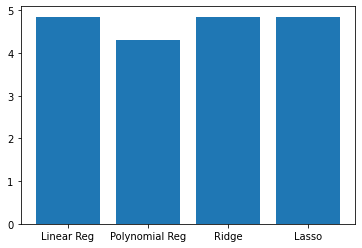

In [104]:
names=list()
names.append('Linear Reg')
names.append('Polynomial Reg')
names.append('Ridge')
names.append('Lasso')

plt.bar(names, mae_list)
plt.show()

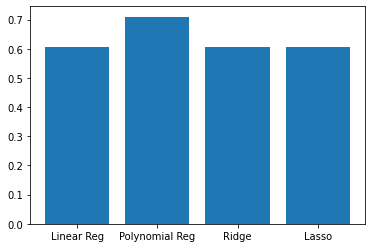

In [105]:
namesr2=list()
namesr2.append('Linear Reg')
namesr2.append('Polynomial Reg')
namesr2.append('Ridge')
namesr2.append('Lasso')

plt.bar(namesr2, r2_list)
plt.show()

**Preguntas**


**¿Qué método conviene más a la empresa?, ¿por qué?**

En mi opinión sería regresión polinomial, ya que es más preciso y no deja por fuera los datos de la esquina superior izquierda al formar una curva, también tiene un valor r2 de 0.70, mientras los demás tienen un aproximado de 0.6.

**¿Qué porcentajes de entrenamiento y evaluación usaste?**

Utilice 70% de entrenamiento y 30% de evaluación para evitar el sobreajuste y comprobar la eficiencia del modelo generado con una mayor cantidad de datos.

**¿Qué error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Podemos notar en los resultados de nuestro modelo de regresión lineal polinomial, que el MAE es menor al RMSE ya que es menos sensible a los valores atípicos, aún así la diferencia no es mucha entre los dos errores y considerando el resultado de r2 podría decirse que el modelo no necesitaría ajustes tan drásticos. Es importante tener en cuenta en donde hay una mayor concentración de datos que están causando el error para mejorar el modelo.

- MAE: 4.31


- RMSE: 5.77


- r2: 0.7097 

